### Os dados utilizados neste trabalho foram fornecidos por [Sajid - dbdmobile](https://www.kaggle.com/datasets/dbdmobile/myanimelist-dataset)
#### Rótulos de Conteúdo (Traduzidos do Inglês):

- `anime_id`: Identificação única para cada anime.

- `Name`: O nome do anime em seu idioma original.

- `English name`: O nome em inglês do anime.

- `Other name`: Nome nativo ou título do anime (pode estar em japonês, chinês ou coreano).

- `Score`: A pontuação ou classificação atribuída ao anime.

- `Genres`: Os gêneros do anime, separados por vírgulas.

- `Synopsis`: Uma breve descrição ou resumo do enredo do anime.

- `Type`: O tipo de anime (por exemplo, série de TV, filme, OVA, etc.).

- `Episodes`: O número de episódios no anime.

- `Aired`: As datas em que o anime foi ao ar.

- `Premiered`: A temporada e o ano em que o anime estreou.

- `Status`: O status do anime (por exemplo, Finalizado, Atualmente em exibição, etc.).

- `Producers`: As empresas de produção ou produtores do anime.

- `Licensors`: Os licenciadores do anime (por exemplo, plataformas de streaming).

- `Studios`: Os estúdios de animação que trabalharam no anime.

- `Source`: O material de origem do anime (por exemplo, mangá, light novel, original).

- `Duration`: A duração de cada episódio.

- `Rating`: A classificação etária do anime.

- `Rank`: A posição do anime com base em popularidade ou outros critérios.

- `Popularity`: A classificação de popularidade do anime.

- `Favorites`: O número de vezes que o anime foi marcado como favorito pelos usuários.

- `Scored By`: O número de usuários que deram uma pontuação ao anime.

- `Members`: O número de membros que adicionaram o anime à sua lista na plataforma.

- `Image URL`: A URL da imagem ou poster do anime.


### Importando as bibliotecas e fazendo as configurações

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

# Usando uma paleta predefinida
sns.set_palette("pastel6")
warnings.filterwarnings('ignore')
%matplotlib inline

### Extraindo os dados e começando a análise

In [22]:
path = "../data/anime-dataset-2023.csv"
df = pd.read_csv(path)
df.sample(3)

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
22564,51916,Dekiru Neko wa Kyou mo Yuuutsu,The Masterful Cat Is Depressed Again Today,デキる猫は今日も憂鬱,UNKNOWN,"Comedy, Supernatural","When Saku took in a stray black cat, she never...",TV,UNKNOWN,"Jul 8, 2023 to ?",...,GoHands,Web manga,Unknown,UNKNOWN,UNKNOWN,5528,35,UNKNOWN,12440,https://cdn.myanimelist.net/images/anime/1074/...
10664,30913,Mekakucity Days,Mekakucity Days,メカクシティデイズ,7.51,Sci-Fi,Mekakucity Days is a series of music videos th...,Music,5.0,"May 30, 2012",...,UNKNOWN,Music,4 min per ep,PG-13 - Teens 13 or older,UNKNOWN,5988,74,3996.0,10221,https://cdn.myanimelist.net/images/anime/10/88...
3995,5189,Chou Tokkyuu Hikarian,Super Express Hikarian,超特急ヒカリアン,6.05,"Action, Adventure",Chou Tokkyuu Hikarian is about a series of bul...,TV,156.0,"Apr 2, 1997 to Mar 29, 2000",...,UNKNOWN,Unknown,7 min per ep,G - All Ages,8608.0,13113,1,326.0,862,https://cdn.myanimelist.net/images/anime/7/744...


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anime_id      24905 non-null  int64 
 1   Name          24905 non-null  object
 2   English name  24905 non-null  object
 3   Other name    24905 non-null  object
 4   Score         24905 non-null  object
 5   Genres        24905 non-null  object
 6   Synopsis      24905 non-null  object
 7   Type          24905 non-null  object
 8   Episodes      24905 non-null  object
 9   Aired         24905 non-null  object
 10  Premiered     24905 non-null  object
 11  Status        24905 non-null  object
 12  Producers     24905 non-null  object
 13  Licensors     24905 non-null  object
 14  Studios       24905 non-null  object
 15  Source        24905 non-null  object
 16  Duration      24905 non-null  object
 17  Rating        24905 non-null  object
 18  Rank          24905 non-null  object
 19  Popu

#### Excluindo as features que não agregam para análise

In [24]:
col_drop = ['Image URL', 'Members', 'Duration', 'Source', 'Licensors', 'Producers', 'Status', 'Premiered', 'Synopsis', 'Other name', 'English name', 'Aired'] 
df = df.drop(columns=col_drop)
df

,anime_id,Name,Score,Genres,Type,Episodes,Studios,Rating,Rank,Popularity,Favorites,Scored By
0,1,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi",TV,26.0,Sunrise,R - 17+ (violence & profanity),41.0,43,78525,914193.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.38,"Action, Sci-Fi",Movie,1.0,Bones,R - 17+ (violence & profanity),189.0,602,1448,206248.0
2,6,Trigun,8.22,"Action, Adventure, Sci-Fi",TV,26.0,Madhouse,PG-13 - Teens 13 or older,328.0,246,15035,356739.0
3,7,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural",TV,26.0,Sunrise,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0
4,8,Bouken Ou Beet,6.94,"Adventure, Fantasy, Supernatural",TV,52.0,Toei Animation,PG - Children,4240.0,5126,14,6413.0
...,...,...,...,...,...,...,...,...,...,...,...,...
24900,55731,Wu Nao Monu,UNKNOWN,"Comedy, Fantasy, Slice of Life",ONA,15.0,UNKNOWN,PG-13 - Teens 13 or older,UNKNOWN,24723,0,UNKNOWN
24901,55732,Bu Xing Si: Yuan Qi,UNKNOWN,"Action, Adventure, Fantasy",ONA,18.0,UNKNOWN,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN
24902,55733,Di Yi Xulie,UNKNOWN,"Action, Adventure, Fantasy, Sci-Fi",ONA,16.0,UNKNOWN,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN
24903,55734,Bokura no Saishuu Sensou,UNKNOWN,UNKNOWN,Music,1.0,UNKNOWN,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN


### Fazendo uma limpeza nas colunas

- Trocando os valores do tipo (str) 'UNKNOWN' pra tipo NaN em Numpy para podemos converter os tipos sem problemas

In [25]:
cols = df.columns

for c in cols:
    df[c] = df[c].replace('UNKNOWN', np.nan)

- Podemos converter de antemão as features para seus respectivos tipos

In [26]:
df['Score'] = df['Score'].astype('float') 
df['Scored By'] = df['Scored By'].astype('float') 
df['Episodes'] = df['Episodes'].astype('float')
df['Rank'] = df['Rank'].astype('float')
df['Genres'] = df['Genres'].astype('str')

- Checando novamente as informações da colunas arrumadas

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   anime_id    24905 non-null  int64  
 1   Name        24905 non-null  object 
 2   Score       15692 non-null  float64
 3   Genres      24905 non-null  object 
 4   Type        24831 non-null  object 
 5   Episodes    24294 non-null  float64
 6   Studios     14379 non-null  object 
 7   Rating      24236 non-null  object 
 8   Rank        20293 non-null  float64
 9   Popularity  24905 non-null  int64  
 10  Favorites   24905 non-null  int64  
 11  Scored By   15692 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 2.3+ MB


- Vamos ter uma visão geral sobre as colunas númericas

In [28]:
df.describe()

,anime_id,Score,Episodes,Rank,Popularity,Favorites,Scored By
count,24905.000000,15692.000000,24294.000000,20293.000000,24905.000000,24905.000000,1.569200e+04
mean,29776.709014,6.380890,14.913518,9960.770167,12265.388356,432.595222,2.997438e+04
std,17976.076290,0.928696,48.581251,5856.990951,7187.428393,4353.181647,1.169348e+05
min,1.000000,1.850000,1.000000,0.000000,0.000000,0.000000,1.000000e+02
25%,10507.000000,5.730000,1.000000,4885.000000,6040.000000,0.000000,3.840000e+02
50%,34628.000000,6.390000,2.000000,9958.000000,12265.000000,1.000000,1.760000e+03
75%,45240.000000,7.060000,13.000000,15032.000000,18491.000000,18.000000,1.085550e+04
max,55735.000000,9.100000,3057.000000,20104.000000,24723.000000,217606.000000,2.660903e+06


- Total de valores nulos em cada variável

In [29]:
df.isna().sum()

anime_id          0
Name              0
Score          9213
Genres            0
Type             74
Episodes        611
Studios       10526
Rating          669
Rank           4612
Popularity        0
Favorites         0
Scored By      9213
dtype: int64

- Infelizmente temos muitos valores nulos em quase todas as features

### Analisando as features individualmente

##### Genre

In [30]:
df["Genres"].value_counts() 

Genres
nan                                              4929
Comedy                                           2279
Fantasy                                          1341
Hentai                                           1181
Drama                                             624
                                                 ... 
Avant Garde, Fantasy, Romance                       1
Action, Comedy, Romance, Supernatural, Hentai       1
Drama, Horror, Supernatural, Ecchi                  1
Adventure, Comedy, Romance, Sports                  1
Action, Adventure, Fantasy, Horror                  1
Name: count, Length: 1006, dtype: int64

- Os valores "nan" estão sendo considerados como string 

- Resumo geral da feature `"Genres"`, os diversos gêneros estão sendo tratados como uma única string, portando, temos que realizar algumas operações antes de nos aprofundar nisso

In [31]:
# Dicionário para armazenar a contagem de cada gênero
genero_contagem = {}

# Iterar sobre cada linha da coluna 'Genres'
for generos in df['Genres']:
    # Dividir a string de gêneros em uma lista separada por vírgulas
    generos_lista = generos.split(',')
    # Iterar sobre cada gênero na lista
    for genero in generos_lista:
        # Remover espaços em branco extras e converter para minúsculas
        genero = genero.strip().lower()
        genero_contagem[genero] = genero_contagem.get(genero, 0) + 1

# Ordena em ordem decrescente
sorted_genres = sorted(genero_contagem.items(), key=lambda x: x[1], reverse=True)

# Imprime todos os gêneros e sua frequência
for i, (genero, contagem) in enumerate(sorted_genres, start=1):
    print(f'{i} - {genero}: {contagem}')


1 - comedy: 7142
2 - fantasy: 5306
3 - nan: 4929
4 - action: 4730
5 - adventure: 3842
6 - sci-fi: 3091
7 - drama: 2836
8 - romance: 2063
9 - slice of life: 1755
10 - supernatural: 1494
11 - hentai: 1486
12 - mystery: 847
13 - avant garde: 804
14 - ecchi: 795
15 - sports: 771
16 - horror: 534
17 - suspense: 242
18 - award winning: 241
19 - boys love: 169
20 - gourmet: 146
21 - girls love: 113
22 - erotica: 54


- Temos muitas entradas unknown (Nan), mas por ser uma váriavel do tipo nominal, acredito que não vai nos atrapalhar e possívelmente podemos remover esses dados
- Plotando os gêneros para melhor visualização dos dados limpos

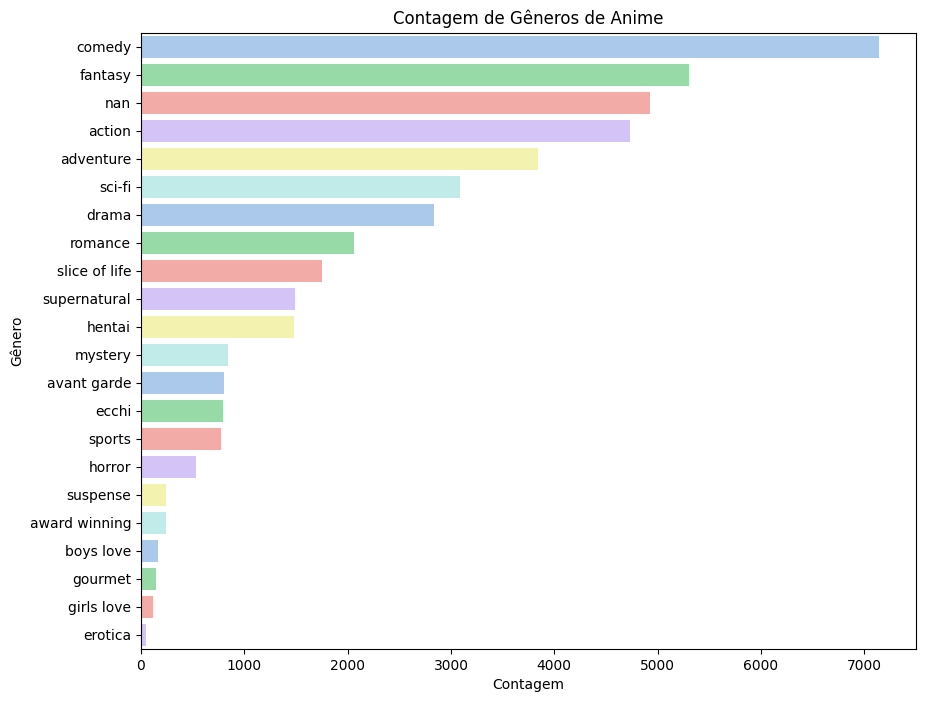

In [32]:
df_genres = pd.DataFrame(sorted_genres, columns=['Genero', 'Contagem'])

cores = sns.color_palette("pastel6", len(df_genres))

plt.figure(figsize=(10, 8))
sns.barplot(x='Contagem', y='Genero', data=df_genres, palette=cores)
plt.title('Contagem de Gêneros de Anime')
plt.xlabel('Contagem')
plt.ylabel('Gênero')
plt.show();

##### Score

- Vamos ver o total de valores nulos que temos na feature `"Score"` para vermos como lidaremos com isso

In [33]:
nan_values = df['Score'].isna().sum()
score_numbers = df['Score'].notna().sum()
print(f"Total of UNKNOWN values: {nan_values}")
print(f"Total of numeric values: {score_numbers}")

Total of UNKNOWN values: 9213
Total of numeric values: 15692


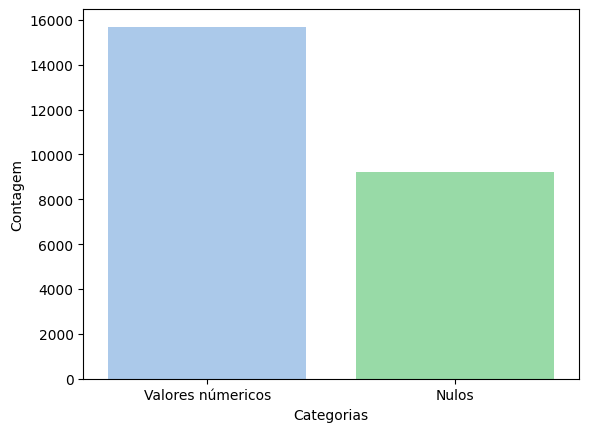

In [34]:
categorias = ['Valores númericos', 'Nulos']
valores = [score_numbers, nan_values]

# Criação do barplot
sns.barplot(x=categorias, y=valores, palette='pastel6')

# Adiciona rótulos aos eixos
plt.xlabel('Categorias')
plt.ylabel('Contagem')
plt.show()

- Temos bastente valores nulos, e infelizmente não podemos usar métodos de propragação como ffill ou bfill, pois, representam uma nota de um anime
- Portando, a única alternativa é eliminar, fazendo um filtro que separa os elementos nulos

In [35]:
filtro = df['Score'].isna()
df[filtro]

,anime_id,Name,Score,Genres,Type,Episodes,Studios,Rating,Rank,Popularity,Favorites,Scored By
1578,1739,Shibawanko no Wa no Kokoro,NaN,nan,TV,80.0,Three-d,G - All Ages,19660.0,13679,1,NaN
1699,1863,Silk Road Shounen Yuuto,NaN,"Adventure, Fantasy",TV,26.0,OLM,NaN,19912.0,13981,0,NaN
2476,2701,Susie-chan to Marvy,NaN,Comedy,TV,104.0,Xebec,NaN,12706.0,16212,0,NaN
2483,2708,Wankorobee,NaN,"Comedy, Fantasy",TV,26.0,"Ajia-do, TMS Entertainment",G - All Ages,13327.0,16545,0,NaN
2508,2735,Mugen Senki Portriss,NaN,"Action, Sci-Fi",TV,52.0,"Sunrise, Dongwoo A&E",PG - Children,18320.0,14460,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
24900,55731,Wu Nao Monu,NaN,"Comedy, Fantasy, Slice of Life",ONA,15.0,NaN,PG-13 - Teens 13 or older,NaN,24723,0,NaN
24901,55732,Bu Xing Si: Yuan Qi,NaN,"Action, Adventure, Fantasy",ONA,18.0,NaN,PG-13 - Teens 13 or older,0.0,0,0,NaN
24902,55733,Di Yi Xulie,NaN,"Action, Adventure, Fantasy, Sci-Fi",ONA,16.0,NaN,PG-13 - Teens 13 or older,0.0,0,0,NaN
24903,55734,Bokura no Saishuu Sensou,NaN,nan,Music,1.0,NaN,PG-13 - Teens 13 or older,0.0,0,0,NaN


- Temos **9213** linhas com os `score`, `scored by` e outros campos nulos 

- A maioria tem mais colunas nulas também, dessa maneira, são inúteis para essa análise e devem ser excluídos

- Iremos excluir as linhas que atendem ao filtro

In [36]:
df = df.drop(df[filtro].index)
print(f'Linhas e colunas restantes, respectivamente: {df.shape}')
df.sample(5)

Linhas e colunas restantes, respectivamente: (15692, 12)


,anime_id,Name,Score,Genres,Type,Episodes,Studios,Rating,Rank,Popularity,Favorites,Scored By
11825,33401,Momotarou (Music),4.73,nan,Music,1.0,NaN,PG - Children,NaN,15750,0,229.0
21053,48825,Kamiari Algorithm,6.79,nan,Music,1.0,TriF Studio,PG-13 - Teens 13 or older,NaN,13748,2,345.0
5607,9047,Toaru Kagaku no Railgun: Misaka-san wa Ima Chu...,7.45,"Action, Fantasy, Sci-Fi",OVA,1.0,J.C.Staff,PG-13 - Teens 13 or older,1876.0,2497,31,34207.0
14351,37703,Megalo Box Specials,6.17,"Sci-Fi, Sports",Special,3.0,TMS Entertainment,R - 17+ (violence & profanity),8040.0,5732,4,1442.0
3156,3604,Hidamari Sketch x 365,7.82,"Comedy, Slice of Life",TV,13.0,Shaft,PG-13 - Teens 13 or older,880.0,3736,180,15490.0


Realizamos uma breve limpeza na feature `Score`, agora poderemos seguir em frente e fazer análise estatística

In [37]:
df['Score'].describe()

count    15692.000000
mean         6.380890
std          0.928696
min          1.850000
25%          5.730000
50%          6.390000
75%          7.060000
max          9.100000
Name: Score, dtype: float64

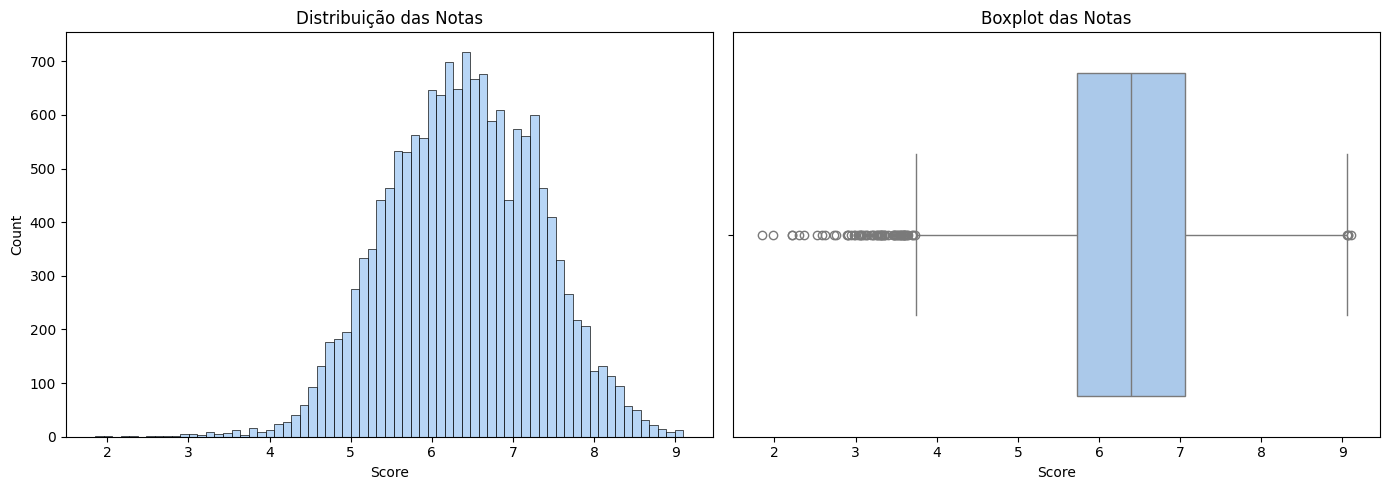

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de Barras - lado esquerdo
sns.histplot(data=df, x='Score', ax=axes[0])  
axes[0].set_title('Distribuição das Notas')

# Gráfico Boxplot - lado direito
sns.boxplot(data=df, x='Score', ax=axes[1])  
axes[1].set_title('Boxplot das Notas')

# Epaçamentos gráficos
plt.tight_layout()
plt.show()


- Temos uma distribuição que se consentra perto dos 6 a 7 

- No Boxpot podemos ver que exitem bastente outliers para notas menores de 4 e para isso teremos que conferir se existe um motivo

- Vamos ver quantas notas abaixo de 4 temos em nossos dados

In [39]:
df[df['Score'] < 4] 

,anime_id,Name,Score,Genres,Type,Episodes,Studios,Rating,Rank,Popularity,Favorites,Scored By
387,413,Hametsu no Mars,2.22,"Horror, Sci-Fi",OVA,1.0,WAO World,R - 17+ (violence & profanity),12698.0,2512,295,47630.0
1215,1345,Soujuu Senshi Psychic Wars,3.08,Action,OVA,1.0,Toei Animation,R+ - Mild Nudity,12681.0,8461,6,2217.0
1441,1585,Spectral Force,3.55,Fantasy,OVA,2.0,NaN,PG-13 - Teens 13 or older,12654.0,10025,2,939.0
1649,1812,Hanoka,3.33,Sci-Fi,TV,12.0,RAMS,PG-13 - Teens 13 or older,12668.0,8071,17,2244.0
1815,1993,Hanoka Recap,3.83,Sci-Fi,Special,1.0,NaN,PG-13 - Teens 13 or older,12628.0,12716,0,535.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15764,39917,Sabiiro no Armor: Reimei,3.79,Action,TV,12.0,Kigumi,PG-13 - Teens 13 or older,12637.0,7478,21,1822.0
15849,40074,Gibiate,3.81,"Action, Fantasy, Horror",TV,12.0,"Studio Elle, l-a-unch・BOX",R - 17+ (violence & profanity),12632.0,2511,56,22998.0
15957,40282,Nendo no Tatakai (2019),3.65,"Action, Comedy",ONA,1.0,NaN,PG - Children,12645.0,11731,2,888.0
16295,40845,Marudase Kintarou,3.97,Boys Love,Movie,1.0,Seven,R+ - Mild Nudity,12616.0,7283,15,2796.0


In [40]:
df[df['Score'] < 4][['Score', 'Favorites', 'Popularity', 'Scored By']].describe()

,Score,Favorites,Popularity,Scored By
count,94.000000,94.000000,94.000000,94.000000
mean,3.393404,16.446809,9580.000000,4609.914894
std,0.483354,49.527795,2859.264651,12577.677871
min,1.850000,0.000000,1206.000000,310.000000
25%,3.132500,1.000000,8254.750000,725.500000
50%,3.515000,2.000000,9990.000000,1450.000000
75%,3.782500,7.750000,11724.250000,2673.250000
max,3.990000,295.000000,14321.000000,101649.000000
